## Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
x = 2 * np.random.rand(100, 1)  # Independent variable
y = 4 + 3 * x + np.random.randn(100, 1)  # Dependent variable

In [2]:
x.shape

(100, 1)

In [3]:
y.shape

(100, 1)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [5]:
X_train.shape,y_train.shape

((70, 1), (70, 1))

In [6]:
from sklearn.model_selection import cross_val_score

linear_regressor = LinearRegression()

linear_regressor.fit(X_train,y_train)

LinearRegression()

In [7]:
# Get the model parameters
print('intercept =', linear_regressor.intercept_[0])
print('slope =',linear_regressor.coef_[0][0])
y_pred = linear_regressor.predict(X_test)

intercept = 4.40130480172774
slope = 2.7599888917416253


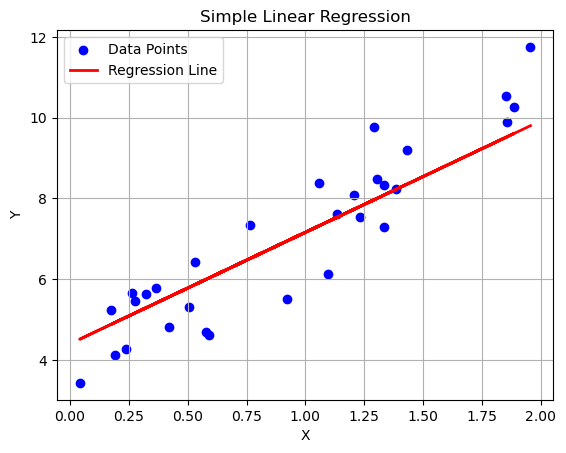

In [8]:
# Plot the data and the regression line
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test,y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.803193704120457
R^2 Score: 0.8243087451184715


## Multiple Linear Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate example data with 1000 data points
n_samples = 1000

# Create a sample dataset
X1 = np.arange(1, n_samples + 1).reshape(-1, 1)
X2 = np.random.rand(n_samples, 1) * 10
X3 = np.random.rand(n_samples, 1) * 10
y = 2 + 3 * X1.flatten() + 1.5 * X2.flatten() + 4 * X3.flatten() + np.random.randn(n_samples)

# Combine features into a single array
X = np.hstack((X1, X2, X3))

# Convert to DataFrame for convenience
data = pd.DataFrame(data=np.hstack((X, y.reshape(-1, 1))), columns=["X1", "X2", "X3", "y"])
df = pd.DataFrame(data)
df

,X1,X2,X3,y
0,1.0,5.488135,5.928803,36.842434
1,2.0,7.151894,0.100637,20.497803
2,3.0,6.027634,4.758262,37.419154
3,4.0,5.448832,7.087704,50.677708
4,5.0,4.236548,0.439754,23.529366
...,...,...,...,...
995,996.0,0.976764,7.912816,3023.621402
996,997.0,5.149222,7.211981,3030.900718
997,998.0,9.384120,4.801078,3029.498396
998,999.0,2.286466,6.438640,3027.524548


In [12]:
# Features and target variable
X = df[['X1', 'X2','X3']]
y = df['y']

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([3018.05498701, 2592.79192302,  953.33707942, 1688.38791694,
       2041.50698961, 2923.78180278,  107.53085474,  705.40944513,
        949.81824412, 2143.6563027 , 1507.60484468, 1725.09661658,
       2389.2311461 ,  733.31275711, 1770.82598197,  181.72177892,
       2761.74486414,  561.20995763,   48.9151417 ,  276.73345651,
        112.30544709, 1464.0743189 ,  974.97368983,  942.39165051,
       2669.09291867, 2406.93924346,  167.2062008 ,  361.45313785,
       2308.84315433,   19.1040347 , 2506.3489177 , 2149.25944784,
       1872.06611673, 2417.11882306, 1274.10547306, 2236.94127875,
       2923.76248825, 1152.0636968 , 2781.16239578,  829.1389812 ,
        706.25205486, 3029.60443944, 1942.85478316, 2123.60811949,
        794.25641018, 2369.22582155, 2509.45380849,  449.1803368 ,
        994.57640075, 1768.34642801, 1032.10358801,  926.56508615,
        809.64356718, 1321.05489   , 2614.52554431, 1786.40645006,
        856.83303407,  846.81220033, 2992.92093264, 1012.59230

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.846487972379071
R^2 Score: 0.9999988727333811


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


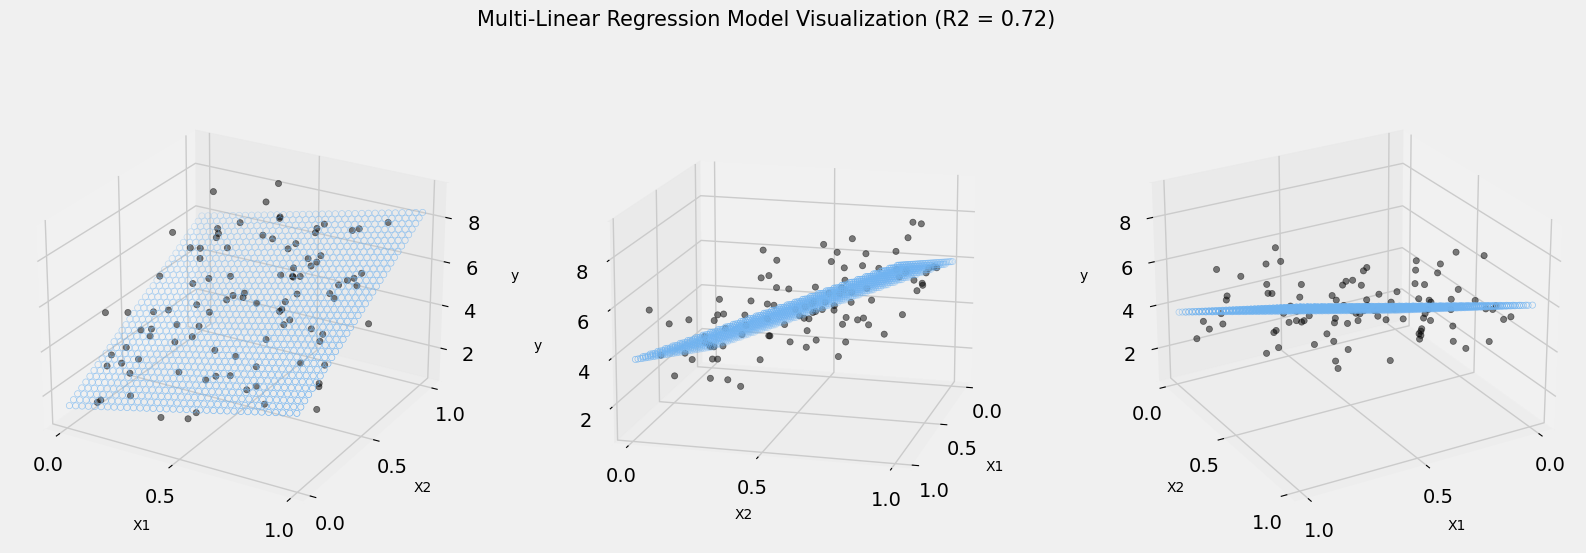

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
X3 = np.random.rand(100)  # Adding X3
y = 3 * X1 + 5 * X2 + 2 * X3 + np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Define features and target
X = df[['X1', 'X2', 'X3']]
y = df['y']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Create ranges for X1 and X2 for the meshgrid
x_range = np.linspace(df['X1'].min(), df['X1'].max(), 35)    
y_range = np.linspace(df['X2'].min(), df['X2'].max(), 35)    
x1_range, y1_range = np.meshgrid(x_range, y_range)
x3_value = np.mean(df['X3'])  # Fix X3 at its mean value

# Generate meshgrid and predictions
viz = np.array([x1_range.flatten(), y1_range.flatten(), x3_value * np.ones_like(x1_range.flatten())]).T
y_pred = model.predict(viz)

# Evaluating the model using the R2 score
r2 = model.score(X, y)

# Plotting the model for visualization
plt.style.use('fivethirtyeight')

# Initialize a matplotlib figure
fig = plt.figure(figsize=(18, 6))

# Create 3D subplot axes
axis1 = fig.add_subplot(131, projection='3d')
axis2 = fig.add_subplot(132, projection='3d')
axis3 = fig.add_subplot(133, projection='3d')

axes = [axis1, axis2, axis3]

# Plotting
for ax in axes:
    ax.scatter(df['X1'], df['X2'], df['y'], color='k', zorder=10, alpha=0.5)
    ax.scatter(viz[:, 0], viz[:, 1], y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('X1', fontsize=10, labelpad=10)
    ax.set_ylabel('X2', fontsize=10, labelpad=10)
    ax.set_zlabel('y', fontsize=10, labelpad=10)
    ax.locator_params(nbins=3, axis='x')
    ax.locator_params(nbins=3, axis='y')

# Set different view angles
axis1.view_init(elev=25, azim=-60)
axis2.view_init(elev=15, azim=15)
axis3.view_init(elev=25, azim=60)

# Title for the figure
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2:.2f})', fontsize=15, color='k')

plt.show()


## Polynomial Regression

Mean Squared Error: 86.43893664263166
Model Coefficients: [[ 0.          4.0097108  -4.74182933  1.0206663 ]]
Model Intercept: [-2.72082703]


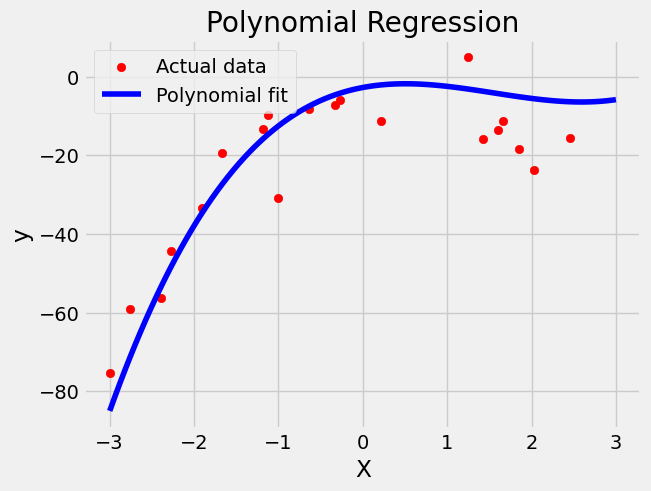

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate example data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 6 * X**2 + 4 * X + np.random.randn(100, 1) * 10

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (e.g., degree 3 polynomial)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions
y_pred = model.predict(X_poly_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Plot the results
# Generate values for plotting
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot the actual vs. predicted values
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_plot, y_plot, color='blue', label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


## Using Pairplot to Identify Relationship between the features

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Generate synthetic data
np.random.seed(0)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
X3 = np.random.rand(100)
y = 3 * X1 + 5 * X2 + 2 * X3 + np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


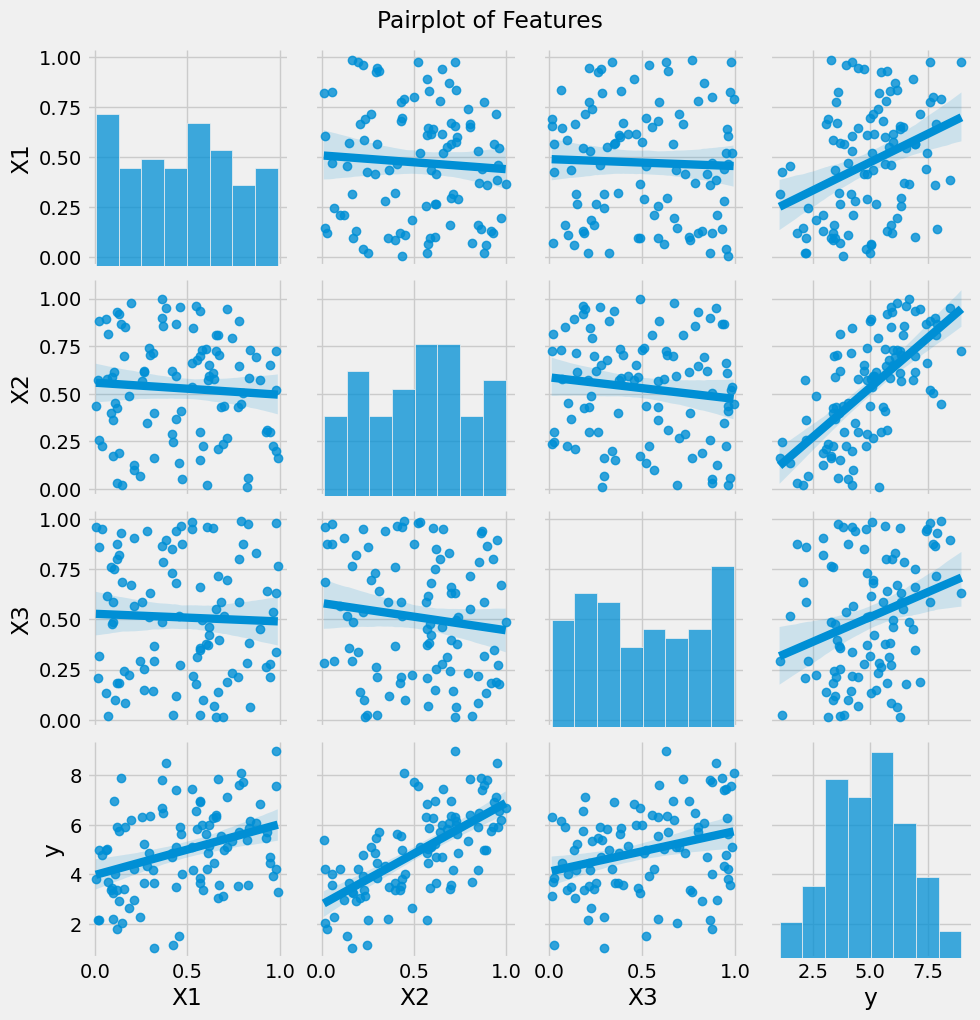

In [21]:
# Create a pairplot
sns.pairplot(df,kind='reg')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

## Ridge and Lasso

In [22]:
from sklearn.datasets import fetch_california_housing as data
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = data()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
df = pd.DataFrame(data.data)
df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
df.columns = data.feature_names
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
df['MedHouseVal'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
# split dependent and independent
X = df.iloc[:,:-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
y = df.iloc[:,-1]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [32]:
ridge = Ridge()

In [33]:
# 1e-15 written out in numbers. 1e-15 in numbers is written as 0.000000000000001
1e-15 # Learning Rate

1e-15

In [34]:
params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [35]:
ridge_regressor.best_params_

{'alpha': 20}

In [36]:
ridge_regressor.best_score_

-0.5581020035625635

### Lasso Regressor

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.765e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.046e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.726e+03, tolerance: 2.110e+00
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [38]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [39]:
lasso_regressor.best_score_

-0.5582759293868982

## Elastic Net Regressor
Elastic Net is a linear regression model that combines two regularization techniques: L1 (Lasso) and L2 (Ridge) regularization. This approach helps address issues like multicollinearity and overfitting by adding a penalty to the size of the coefficients.

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
# Initialize the ElasticNet model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_pred

array([3.3254758 , 3.11351785, 3.18106388, ..., 1.3833997 , 1.4344702 ,
       1.55011857])

#### Prepared By,
Ahamed Basith